In [3]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import os
import random
import time
import pickle
import gc
import re
import itertools

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
main_dir = '/tf/notebooks/'

In [7]:
ldadata_path = main_dir+'final-project/LDA/data/gender/'

In [11]:
all_speeches_topics_df = pd.read_pickle(ldadata_path+'speeches_topics_20')
all_speeches_topics_df.shape

(62716, 7)

In [12]:
all_speeches_topics_df.head()

,Topic_Count,Prim_Topic,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Contrib,Speech_id
0,3.0,8.0,0.68,"vote,republican,house,rule,debate,majority,rep...",1.0,0.15,1080099024
1,10.0,10.0,0.61,"american,live,nation,day,world,great,history,a...",5.0,0.12,1080165561
2,7.0,7.0,0.41,"military,defense,war,veterans,iraq,service,for...",3.0,0.33,1090156218
3,7.0,4.0,0.71,"get,think,want,know,come,talk,let,way,see,country",8.0,0.13,1060121740
4,10.0,6.0,0.45,"fund,federal,service,program,provide,project,s...",9.0,0.12,1100177577


In [21]:
all_speeches_topics_df.Speech_id = all_speeches_topics_df.Speech_id.astype('int')

In [24]:
classdata_path = main_dir+'final-project/Classification/data/gender'

In [25]:
descr_pred_df = pd.read_pickle(os.path.join(classdata_path, 'gender_preds.pkl'))
descr_pred_df.shape

(62716, 20)

In [26]:
descr_pred_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match,ids,pred_probs_combo,pred_combo
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,66.0,0.0,0.0,1.0,Mrs. CAPPS,"CAPPS, LOIS",fuzzy,1080099024,0.637449,True
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,58.0,0.0,1.0,1.0,Ms. LEE,"LEE, BARBARA",fuzzy,1080165561,0.793786,True
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,49.0,1.0,1.0,1.0,Ms. SOLIS,"SOLIS, HILDA",exact,1090156218,0.861398,True
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,56.0,0.0,0.0,1.0,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact,1060121740,0.670314,True
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,59.0,0.0,0.0,1.0,Mrs. DRAKE,"DRAKE, THELMA",exact,1100177577,0.537273,True


In [27]:
final_df = descr_pred_df.merge(all_speeches_topics_df, 
                               left_on='speech_id',
                               right_on='Speech_id')
final_df.shape

(62716, 27)

In [40]:
final_df['Correct_pred'] = final_df.Female == final_df.pred_combo
np.mean(final_df['Correct_pred'])

0.8281140378850692

### Average gender score by topic

In [42]:
final_df[['pred_probs_combo', 'Correct_pred', 'Prim_Topic']]\
        .groupby('Prim_Topic')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                      count      mean         mean
Prim_Topic                                        
11.0                   2203  0.615217     0.837948
3.0                    1823  0.609134     0.835436
15.0                   1346  0.605278     0.840267
13.0                   2321  0.584838     0.831969
7.0                     988  0.561723     0.811741
6.0                    2584  0.553268     0.809985
10.0                   4035  0.550787     0.814870
14.0                   5670  0.541568     0.814109
5.0                    1081  0.532844     0.839963
19.0                   1826  0.530349     0.800110
0.0                    1261  0.528895     0.804917
16.0                   1481  0.524432     0.816340
2.0                    2653  0.498861     0.821711
17.0                   3168  0.486024     0.832071
9.0                    4939  0.478459     0.824256
4.0                   11334  0.477210     0.844097
8.0                    2065  0.467195     0.840678
12.0                   6149  0.446194     0.826964
1.0                    3553  0.438486     0.827188
18.0                   2236  0.412573     0.849284

In [85]:
final_df[['pred_probs_combo', 'Correct_pred', 'Sec_Topic']]\
        .groupby('Sec_Topic')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                     count      mean         mean
Sec_Topic                                        
 3.0                  2509  0.582238     0.830211
 15.0                 1760  0.576140     0.825000
 11.0                 1826  0.567786     0.842826
 13.0                 2816  0.557344     0.826349
 14.0                 3230  0.550247     0.813622
 10.0                 4791  0.546074     0.823001
 6.0                  3332  0.538249     0.821429
 7.0                  1814  0.523900     0.808710
 0.0                  1482  0.514237     0.827260
 5.0                  1835  0.509174     0.844142
 16.0                 2060  0.507654     0.805340
 19.0                 2038  0.499398     0.820412
 4.0                  7890  0.496441     0.840558
 17.0                 3226  0.496418     0.827650
 2.0                  2271  0.494685     0.830031
-1.0                   583  0.487813     0.797599
 9.0                  4639  0.474292     0.826471
 12.0                 6839  0.472118     0.825413
 1.0                  3025  0.448595     0.819174
 8.0                  2305  0.436850     0.854230
 18.0                 2445  0.421242     0.849080

### Topics by Congress

In [87]:
congress_df = final_df[['Congress', 'Prim_Topic', 'speech_id', 'Female', 'pred_probs_combo']]\
                .groupby(['Congress', 'Prim_Topic'])\
                .agg({'speech_id': ['count'], 'Female': ['mean', 'sum'], 'pred_probs_combo': ['mean']})\
                .reset_index()
congress_df.columns = ['_'.join(col) for col in congress_df.columns]
congress_df.shape

(360, 6)

In [89]:
congress_df.head()

,Congress_,Prim_Topic_,Female_mean,Female_sum,speech_id_count,pred_probs_combo_mean
0,97,0.0,0.240741,13.0,54,0.415010
1,97,1.0,0.112108,25.0,223,0.334204
2,97,2.0,0.234483,34.0,145,0.397596
3,97,3.0,0.381818,21.0,55,0.487076
4,97,4.0,0.185990,77.0,414,0.347634


In [99]:
top_gender_topics = [11,3,15,13]
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

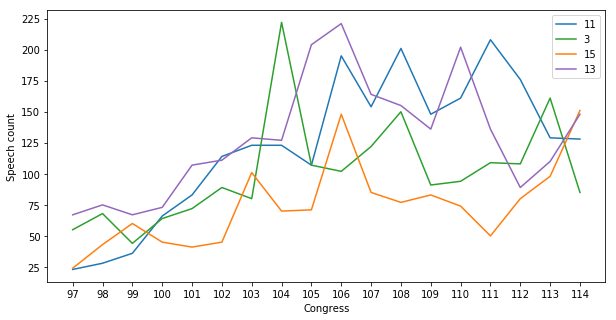

In [109]:
plt.figure(figsize=(10,5))
plt.xlabel('Congress')
plt.ylabel('Speech count')

for i in range(len(top_gender_topics)):
    x = congress_df[congress_df.Prim_Topic_==top_gender_topics[i]].Congress_
    y = congress_df[congress_df.Prim_Topic_==top_gender_topics[i]].speech_id_count
    plt.plot(x, y, color=colors[i], label=top_gender_topics[i])
    plt.xticks(range(97,115))
    plt.legend()

### Top topics in probability bins

In [59]:
bins = np.linspace(0,1,6)
final_df['binned'] = np.digitize(final_df.pred_probs_combo, bins)
final_df['binned'].value_counts()

3    19387
4    17073
2    16810
5     5156
1     4290
Name: binned, dtype: int64

In [78]:
final_df['binned'].value_counts()

3    19387
4    17073
2    16810
5     5156
1     4290
Name: binned, dtype: int64

In [84]:
for b in range(1,len(bins)+1):
    temp = final_df[final_df['binned']==b]
    temp = temp[['speech_id', 'pred_probs_combo', 'Prim_Topic']]\
                .groupby('Prim_Topic')\
                .agg({'speech_id':['count'], 'pred_probs_combo': ['mean']})\
                .sort_values(by=('speech_id', 'count'), ascending=False)\
                .reset_index()
    print("Bin: ", bins[b-1])
    print(temp.head(10))

Bin:  0.0
  Prim_Topic speech_id pred_probs_combo
                 count             mean
0        4.0      1130         0.150549
1       12.0       606         0.152774
2        9.0       384         0.151636
3        1.0       354         0.152194
4       18.0       307         0.150630
5       17.0       260         0.149559
6        8.0       242         0.147713
7       14.0       204         0.157245
8        2.0       146         0.153313
9       10.0       127         0.158986
Bin:  0.2
  Prim_Topic speech_id pred_probs_combo
                 count             mean
0        4.0      3380         0.301095
1       12.0      2137         0.301705
2        9.0      1523         0.307053
3       14.0      1301         0.314216
4        1.0      1275         0.301800
5       17.0       953         0.304673
6       18.0       858         0.297666
7       10.0       848         0.313843
8        2.0       740         0.304883
9        8.0       611         0.300797
Bin:  0.4
  Prim_Top